In [115]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Independent Variables

In [95]:
x=[i for i in range(11)] #a list is created
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [96]:
x=np.array(x,dtype=np.float32) #we have to convert them to array and then to tensor
#datatype should be float for gradient calculations
print(x.shape)
x

(11,)


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
      dtype=float32)

In [97]:
#2D required
x=x.reshape(-1,1) #change from single array to 11 nested arrays 
x

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]], dtype=float32)

In [98]:
x.shape

(11, 1)

# Dependent Variables

In [99]:
y=[2*i+1 for i in x]
y=np.array(y,dtype=np.float32)

In [100]:
y=y.reshape(-1,1)
y

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [101]:
y.shape

(11, 1)

In [102]:
#Incase you cant use comprehension(iterators)
#y=[]
#for i in x
    #result=2*i+1
    #y.append(result)

In [103]:
import torch.nn as nn #Helps in building our linear regression model
from torch.autograd import Variable

In [104]:
#Create model
class LinearRegressionModel(nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegressionModel,self).__init__() #Inherits nn.module and allows to access all its goodness 
        self.Linear=nn.Linear(input_dim,output_dim) #Input Dimension is x and output dimension is y
        
    def forward(self,x): #Create forward function
        out=self.Linear(x)
        return out

In [105]:
#Instantiate above class(creating object by passing parameters to the constructor) 

input_dim=1 #dimension is 1 for both x and y
output_dim=1
model=LinearRegressionModel(input_dim,output_dim)

#GPU version
if torch.cuda.is_available():
    model.cuda()

In [106]:
#Instantiate loss class
criterion=nn.MSELoss()

In [107]:
#Instantiate optimizer classS
lr=.01
optimizer=torch.optim.SGD(model.parameters(),lr=lr)

In [108]:
epochs=100
for ep in range(epochs):  
    ep+=1
    
    if torch.cuda.is_available():
        inputs=Variable(torch.from_numpy(x).cuda())
        labels=Variable(torch.from_numpy(y).cuda())
    else:
        inputs=Variable(torch.from_numpy(x))
        labels=Variable(torch.from_numpy(y))
    
#     Clear gradients wrt every parameter in each epoch
    optimizer.zero_grad()
    
#     y=a*x+b . The forward function is being called here
    outputs=model(inputs) # we provide only input values and function gives the predicted y value
    
#     Calculate loss
    loss=criterion(outputs,labels)
    
#     Calculate backpropagation
    loss.backward()
    
#     Update parameters
    optimizer.step()
    
    print('epoch {},loss {}'.format(ep,loss.data[0]))

epoch 1,loss 63.34136962890625
epoch 2,loss 5.210350513458252
epoch 3,loss 0.4682990610599518
epoch 4,loss 0.08102156966924667
epoch 5,loss 0.04895449057221413
epoch 6,loss 0.0458659790456295
epoch 7,loss 0.04514644294977188
epoch 8,loss 0.04462534561753273
epoch 9,loss 0.044125642627477646
epoch 10,loss 0.043632857501506805
epoch 11,loss 0.04314561188220978
epoch 12,loss 0.04266384616494179
epoch 13,loss 0.04218737781047821
epoch 14,loss 0.04171627014875412
epoch 15,loss 0.04125043377280235
epoch 16,loss 0.04078982397913933
epoch 17,loss 0.040334295481443405
epoch 18,loss 0.03988388925790787
epoch 19,loss 0.03943851217627525
epoch 20,loss 0.03899805247783661
epoch 21,loss 0.038562677800655365
epoch 22,loss 0.03813198208808899
epoch 23,loss 0.037706244736909866
epoch 24,loss 0.03728513419628143
epoch 25,loss 0.03686877340078354
epoch 26,loss 0.0364571213722229
epoch 27,loss 0.03604996204376221
epoch 28,loss 0.03564741462469101
epoch 29,loss 0.035249389708042145
epoch 30,loss 0.03485573

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:27: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


In [109]:
predicted=model(Variable(torch.from_numpy(x))).data.numpy()

In [110]:
predicted

array([[ 0.76557565],
       [ 2.799335  ],
       [ 4.8330946 ],
       [ 6.8668537 ],
       [ 8.900613  ],
       [10.934372  ],
       [12.968132  ],
       [15.001891  ],
       [17.03565   ],
       [19.06941   ],
       [21.103168  ]], dtype=float32)

In [111]:
y

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

<function matplotlib.pyplot.show(*args, **kw)>

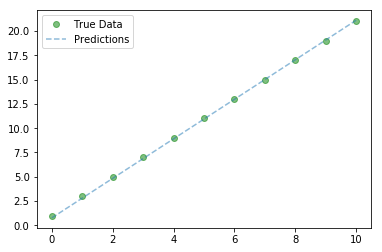

In [112]:
plt.clf()
predicted=model(Variable(torch.from_numpy(x))).data.numpy()
plt.plot(x,y,"go",label="True Data",alpha=0.5)
plt.plot(x,predicted,"--",label="Predictions",alpha=0.5)
plt.legend(loc="best")
plt.show

In [113]:
#save model
save_model=True
if save_model is True:
    torch.save(model.state_dict(),'practice.pkl')

In [114]:
load_model=True
if load_model is True:
    model.load_state_dict(torch.load('practice.pkl'))